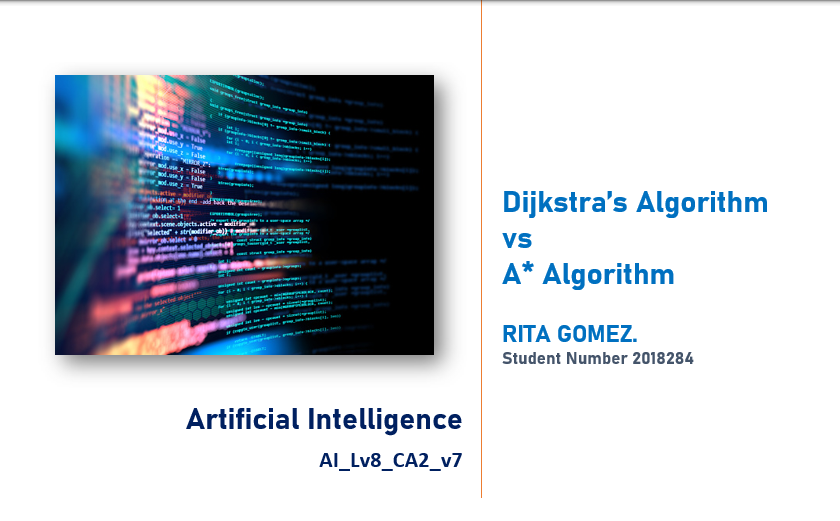

### 1 A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possibleroutes to the solution. The starting point of the game is represented by A, the solution is represented by F. The other points in the graph are possible intermediary stages.

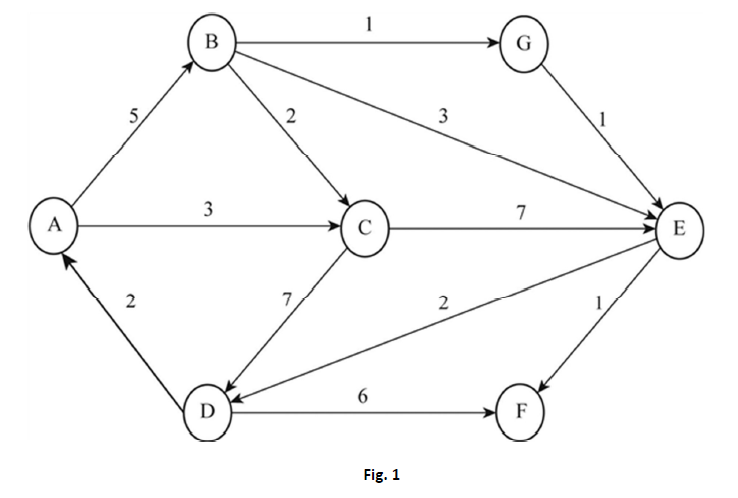



### (a) The graph in Fig. 1 is a visualisation of the problem.

####   (i)Identify the differences between a graph and a tree.
   
   Basically, tree and graph come under the category of non-linear data structure where tree offers a very useful way of representing a relationship between the nodes in a hierarchical structure and graph follows a network model. Tree and graph are differentiated by the fact that a tree structure must be connected and can never have loops while in the graph there are no such restrictions.
   
   Graph and tree are the non-linear data structure which is used to solve various complex problems. A non-linear data structure consists of a collection of the elements that are distributed on a plane which means there is no such sequence between the elements as it exists in a linear data structure.
   
•	In a tree there exist only one path between any two vertices whereas a graph can have unidirectional and bidirectional paths between the nodes.

•	In the tree, there is exactly one root node, and every child can have only one parent. As against, in a graph, there is no concept of the root node.

•	A tree cannot have loops and self-loops while graph can have loops and self-loops.

•	Graphs are more complicated as it can have loops and self-loops. In contrast, trees are simple as compared to the graph.

•	The tree is traversed using pre-order, in-order and post-order techniques. On the other hand, for graph traversal, we use BFS (Breadth First Search) and DFS (Depth First Search).

•	A tree can have n-1 edges. On the contrary, in the graph, there is no predefined number of edges, and it depends on the graph.

•	A tree has a hierarchical structure whereas graph has a network model.


#### (ii) Explain how the graph is an abstraction of the problem.

   As we know and in simple terms, abstraction “displays” only the relevant attributes of objects and “hides” the unnecessary details in order to reduce it to a set of essential characteristics and therefore reduce complexity and increase efficiency.
   
   In this case, this graph is showing its nodes, its edges, its heuristics, and its explicit relationships between nodes. It is a directed graph where the edges indicate directions. As in a graph representing a child of a parent, the child cannot be the parent of its parent.

#### (iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1.

   Graphs are interesting and useful data structures because they can easily be represented as mathematical equations, which are the backing for all the algorithms we use. As I mentioned before, this graph is categorized as a “Directed graph” where the Edges indicate direction and the Relationships between two nodes are explicit, in this case called also as “cost” or “weight”.


### b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation.

In [6]:
import heapq

def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
       
    return distances

In [7]:
graph = {
    'A': {'B': 5, 'C': 3},
    'B': {'C': 2, 'E': 3, 'G': 1},
    'C': {'E': 7, 'D': 7},
    'D': {'A': 2, 'F': 6},
    'E': {'F': 1, 'D': 2},
    'F': {},
    'G': {'E': 1},
}


In [8]:
print(calculate_distances(graph, 'A'))

{'A': 0, 'B': 5, 'C': 3, 'D': 9, 'E': 7, 'F': 8, 'G': 6}


#### Brief Explanation
   Given a directed graph and a source vertex in the graph, I had to find the shortest distance and path from source to target vertex in the given graph where edges are weighted (non-negative) and directed from parent vertex to source vertices. The explanation for this method would be:
   
•	Mark all vertices unvisited. Create a set of all unvisited vertices.

•	Assign zero distance value to source vertex and infinity distance value to all other vertices.

•	Set the source vertex as current vertex

•	For current vertex, consider all of its unvisited children and calculate their tentative distances through the current. (Distance of current + weight of the corresponding edge) Compare the newly calculated distance to the current assigned value (can be infinity for some vertices) and assign the smaller one.

•	After considering all the unvisited children of the current vertex, mark the current as visited and remove it from the unvisited set.

•	Similarly, continue for all the vertex until all the nodes are visited.

   As we can see, in the results, we see how the node A which is the start node, finds a path to a final node F for example, with a cost of 8, which is the minimum or shortest path.


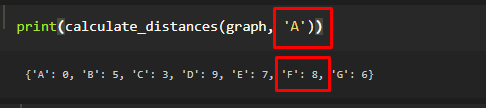

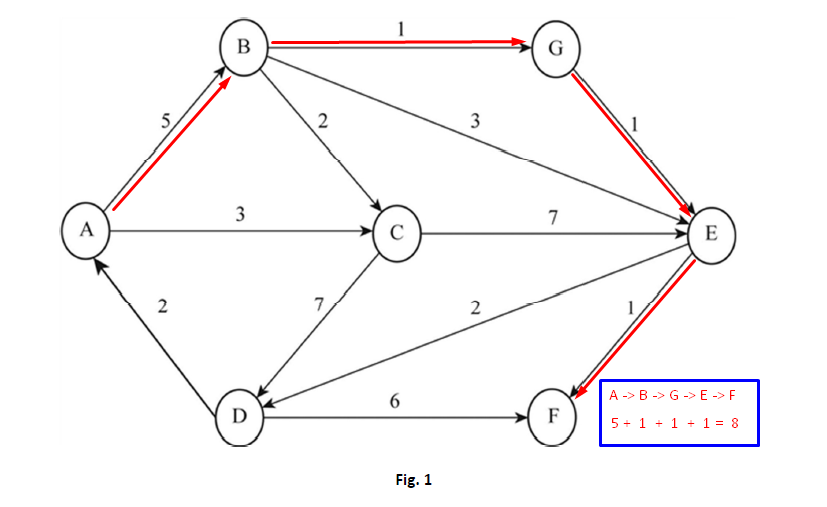

###  2)-  The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, making reference to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed.

#### *A star Algorithm

In [9]:
from collections import deque
class Graph:

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]
#the heuristic for A = 0 because it is the start node, then I gave 0 heuristics to the rest nodes
    def h(self, n):
        H = {
            'A': 0,
            'B': 0,
            'C': 0,
            'D': 0,
            'E': 0,
            'F': 0,
            'G': 0
        }
        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [10]:
adjacency_list = {
    'A': [('B', 5), ('C', 3)],
    'B': [('C', 2), ('G', 1), ('E', 3)],
    'C': [('D', 7), ('E', 7)],
    'D': [('A', 2), ('F', 6)],
    'E': [('D', 2), ('F', 1)],
    'F': [],
    'G': [('E', 1)]
}

graph1 = Graph(adjacency_list)
graph1.a_star_algorithm('A', 'F')

Path found: ['A', 'B', 'G', 'E', 'F']


['A', 'B', 'G', 'E', 'F']

## Brief explanation and Conclusion.
   First of all, we know that exists a formula for Dijkstra algorithm that is f = g, which means there is no heuristic cost.
   
   A* is basically an informed variation of Dijkstra. It is considered a "best first search" because it greedily chooses which vertex to explore next, according to the value of the following function:  f(v) = h(v) + g(v) where g(v) as same as Dijkstra, is the real cost to reach a node v. on the other hand, h(v)is the approximate cost from node v to goal node. It is a heuristic function. This heuristic function should never overestimate the cost. That means, the real cost to reach goal node from node v should be greater than or equal h(v). It is called admissible heuristic.
   
   For this CA, we were not given any heuristics, so I used a non-informative heuristic function: h(v) = 0 for each v, therefore I get that A* chooses which vertex to develop next according to the "so far cost" (g(v)) only, same as Dijkstra's algorithm - so if h(v) = 0, A* defaults to Dijkstra's Algorithm.
   
   With this brief explanation, my conclusion is that A* is just like Dijkstra, the only difference is that A* tries to look for a better path by using a heuristic function which gives priority to nodes that are supposed to be better than others while Dijkstra's just explore all possible paths.
    Its optimality depends on the heuristic function used, so it can return a non-optimal result because of this and at the same time better the heuristic for your specific layout, and better will be the results (and possibly the speed).
    
   A* is meant to be faster than Dijkstra even if it requires more memory and more operations per node since it explores the nodes in a different and more optimized order and the gain is good in any case.


#### References:
Article title:	Difference Between Tree and Graph (with Comparison chart) - Tech Differences
Website title:	Tech Differences
URL:	https://techdifferences.com/difference-between-tree-and-graph.html

Article title:	Shortest path in a directed graph by Dijkstra’s algorithm - GeeksforGeeks
Website title:	GeeksforGeeks
URL:	https://www.geeksforgeeks.org/shortest-path-in-a-directed-graph-by-dijkstras-algorithm/?ref=rp

Author	Difference [duplicate]
Article title:	Difference and advantages between dijkstra & A star
Website title:	Stack Overflow
URL:	https://stackoverflow.com/questions/13031462/difference-and-advantages-between-dijkstra-a-star
